## LAB Assignment  
This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning (e.g., Random Forests). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes.

For this lab assignment, we'll use the algorithms we've learned today to fit the model and evaluate the model’s prediction performance. The scikit-learn package will be used to save your time.


### Decision tree
- <font size=4>Step 1. load iris dataset </font>

Datasets: First, we load the scikit-learn iris toy dataset .

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

- <font size=4> Step 2. Define the features and the target </font>

In [4]:
X = iris.data[:,2:]
y = iris.target

- <font size=4> Step 3. Visualization </font>
  
    We need to use proper visualization methods to have an intuitive understanding.

    For visualization, only the last 2 attributes are used.


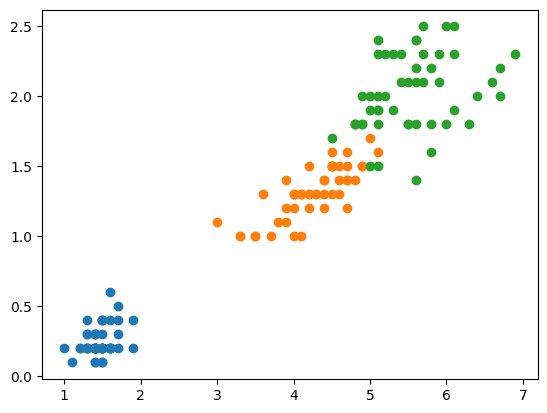

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

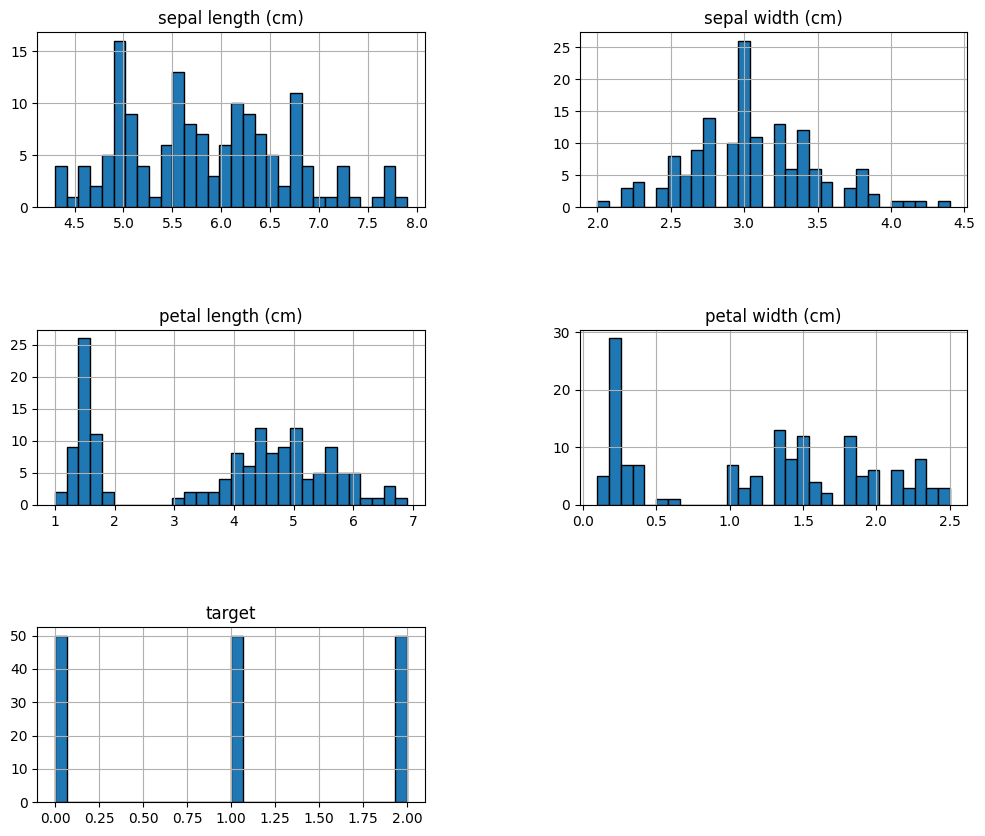

In [6]:
########### Write Your Code Here ###########
iris = datasets.load_iris(as_frame=True)
iris.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
############################################

- <font size=4> Step 4. Preprocessing data </font>
Please check whether the data needs to be preprocessed

In [7]:
########### Write Your Code Here ###########
columns_feature = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
column_target = ['target']
features = iris.frame.copy()
#deal with out liner
import scipy.stats as stats
features['ZR sepal length (cm)'] = stats.zscore(features['sepal length (cm)'])
features['ZR sepal width (cm)'] = stats.zscore(features['sepal width (cm)'])
features['ZR petal length (cm)'] = stats.zscore(features['petal length (cm)'])
features['ZR petal width (cm)'] = stats.zscore(features['petal width (cm)'])
print(features.shape)
features= features[(features['ZR sepal length (cm)']>-3) & (features['ZR sepal length (cm)']<3)]
features= features[(features['ZR sepal width (cm)']>-3) & (features['ZR sepal width (cm)']<3)]
features= features[(features['ZR petal length (cm)']>-3) & (features['ZR petal length (cm)']<3)]
features= features[(features['ZR petal width (cm)']>-3) & (features['ZR petal width (cm)']<3)]
print(features.shape)
target = np.array(features[column_target])
features = features[columns_feature]
print(features)
############################################
#Data scaling
from sklearn.preprocessing import StandardScaler
def scaling(X) :
    X = StandardScaler().fit_transform(X)
    return X


features = scaling(features)
print(features)

(150, 9)
(149, 9)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[149 rows x 4 columns]
[[-0.89892658  1.07118

- <font size=4> Step 5. Split the dataset into train and test sets </font>
  
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [12]:
########### Write Your Code Here ###########
X = np.array(features)
Y = np.array(target)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state =0)
y_train = y_train.reshape(1, -1)[0]
############################################

- <font size=4> Step 6. Explore the model parameters </font>
  
Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

    The decision tree model  given by the `SkLearn`  is as follows:

    ```python
    DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
    ```
    There are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance.  
    Adjust these parameters: `criterion`,`max_depth`, `min_samples_leaf`,  `min_samples_split` , `max_leaf_nodes `,`min_impurity_split `
    and explain how it affects the bias and variance of the classification results. 







In [52]:
########### Write Your Code Here ###########
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
tree = DecisionTreeClassifier(random_state=123)
"""
#criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "log_loss" and "entropy" both for the Shannon information gain, see tree_mathematical_formulation.
即不同的ASM方法

#max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
设置最大的树层数，影响模型的复杂度 若设置的小可能导致模型的bias大,不设置则会在子集小于 min_samples_split或 剪枝到没有下一个branch结束

#min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.
当split后的子集合,都至少为min_samples_leaf,split才会发生; 过大可能导致underfitting因为leafnode无法生成

#min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

max_leaf_nodes : int, default=None
    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
限制最大的leaf node数量即class的数量;过小可能导致underfitting 过大可能导致overfitting

#min_impurity_decrease : float, default=0.0
    A node will be split if this split induces a decrease of the impurity greater than or equal to this value
限制信息增益的大小，信息增益小于设定数值的分枝不会发生
"""
from sklearn.model_selection import GridSearchCV
parameters = {  'min_samples_split':[*range(2,10)]
                ,'criterion':("gini", "entropy", "log_loss")
                ,"max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                ,'max_leaf_nodes':[*range(2,10)]
}


clf_DT = DecisionTreeClassifier()
GS = GridSearchCV(clf_DT, param_grid = parameters, cv=5, n_jobs= -1)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)
############################################

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9666666666666668


    Finally, select the best set of parameters for the following steps.

- <font size=4> Step 7. Use the model of your choice on the test set </font>


In [21]:
########### Write Your Code Here ###########
clf_DT = DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2)
clf_DT.fit(X_train,y_train)
y_pred = clf_DT.predict(X_test)
############################################

- <font size=4> Step 8. Evaluate the model </font>

In [22]:
########### Write Your Code Here ###########
from mlxtend.evaluate import bias_variance_decomp
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_DT, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')


from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,f1_score



print(f'accuracy_score: {round(accuracy_score(y_test, y_pred), 4)}n')
print(f'MSE: {round(mean_squared_error(y_test, y_pred), 4)}')
print(f'r2: {round(r2_score(y_test, y_pred), 4)}')
############################################

Average Expected Loss: 0.652n
Average Bias: 19.5333
Average Variance: 0.0133
accuracy_score: 0.9n
MSE: 0.1
r2: 0.8459


- <font size=4> Step 9. Visual decision boundary and generated decision tree </font>

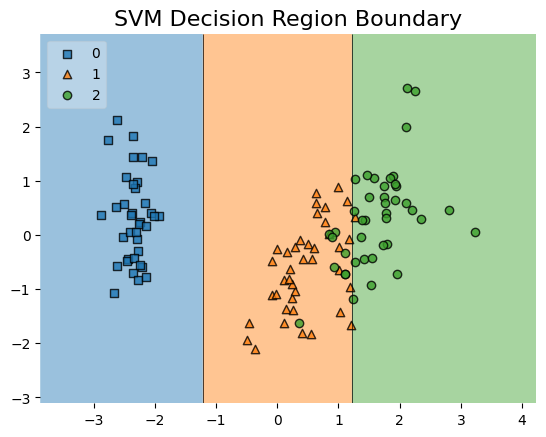

In [28]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

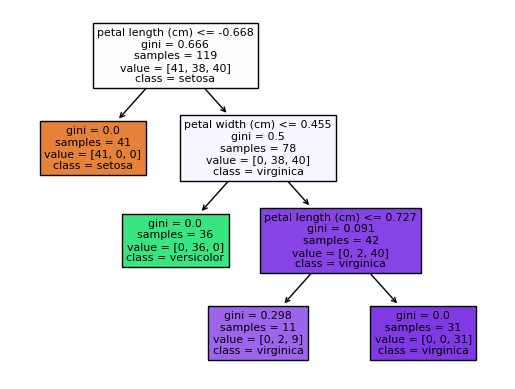

In [26]:
########### Write Your Code Here ###########
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree


plot_tree(clf_DT,filled=True,feature_names=iris.feature_names, class_names=iris.target_names)	
plt.show()	
############################################

### Random forest

In this section, you are required to use random forests for classification. Thus, in `scikit-learn`, there are two ways to implement a random forset, from the Bagging view and from the RF view.<br>
Classify `iris`  using `BaggingClassifier( )` and `RandomForestClassifier( )` respectively, 

- <font color=blue >**RF view:**</font> we construct a RF class directly.
  
```python
# Use Random Forest directly

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
rf_clf.fit(X,y)
```

- <font color=blue face=雅黑>**Bagging view:**</font>  we use the bagging algorithm with a number of base learning algorithms of decision trees.
  
```python
# Use Random Forest from Bagging view

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X,y)
```

- Compare the performances of two  methods, and select different parameters for model  and evaluate the model using bias and variance




In [121]:
########### Write Your Code Here ###########
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )

parameters_rf = {  
                'n_estimators':[*range(200,500,100)]
                ,'min_samples_split':[*range(2,5)]
                ,'criterion':("gini", "entropy", "log_loss")
                ,"max_depth":[*range(3,7,2)]
                ,'min_samples_leaf':[*range(1,20,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.4,4)]
                ,'max_leaf_nodes':[*range(2,6)]
}

GS_rf = GridSearchCV(rf_clf, param_grid = parameters_rf, cv=5, n_jobs= -1)
GS_rf.fit(X_train,y_train)
print(GS_rf.best_params_)
print(GS_rf.best_score_)


##############

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.975


In [25]:
rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                criterion='gini',
                                max_depth=3,
                                max_leaf_nodes=3,
                                min_impurity_decrease=0.0,
                                min_samples_leaf=1,
                                min_samples_split=2
                                # n_jobs=-1
                               )
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

print('RandomForestClassifierClassifier:')
print(f'accuracy_score: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred), 4)}')
print(f'r2: {round(r2_score(y_test, y_pred), 4)}')

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rf_clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

RandomForestClassifierClassifier:
accuracy_score: 0.9
MSE: 0.1
r2: 0.8459
Average Expected Loss: 0.652n
Average Bias: 19.5333
Average Variance: 0.0133


In [115]:
from sklearn.ensemble import BaggingClassifier


bagging_clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2),
                                
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )

parameters_bagging = {  'n_estimators':[*range(200,600,50)]
                ,"max_features":[*range(1,5)]
}

GS_bagging = GridSearchCV(bagging_clf, param_grid = parameters_bagging, cv=5, n_jobs= -1)
GS_bagging.fit(X_train,y_train)
print(GS_bagging.best_params_)
print(GS_bagging.best_score_)
##############################

{'max_features': 1, 'n_estimators': 300}
0.975


In [125]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2),
                                n_estimators=300,
                                max_features=1,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
accuracy_score(y_test, y_pred)

print('BaggingClassifierClassifier:')
print(f'accuracy_score: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred), 4)}')
print(f'r2: {round(r2_score(y_test, y_pred), 4)}')

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(bagging_clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

BaggingClassifierClassifier:
accuracy_score: 0.9333
MSE: 0.0667
r2: 0.8973
Average Expected Loss: 0.6533n
Average Bias: 19.6
Average Variance: 0.02


### Other ensemble learning
For classification, we have many models to choose . Please don't just pick a model to train and say it's good enough. We need to select models based on some metrics, such as choosing models with low bias and low variance.

In this part, you are required  to use `AdaBoost` and `Gradient boosting`.Compare their performances with decision tree and random forest, and finally select the best model  and the optimal  parameters for iris classification.




In [127]:
from sklearn.ensemble  import AdaBoostClassifier


clf_Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2))

parameters_Ada = {  
                'n_estimators':[*range(200,500,100)]
                ,'learning_rate':[*np.linspace(0.1,1.2,20)]
}
GS_Ada = GridSearchCV(clf_Ada, param_grid = parameters_Ada, cv=5, n_jobs= -1)
GS_Ada.fit(X_train,y_train)
print(GS_Ada.best_params_)
print(GS_Ada.best_score_)

{'learning_rate': 0.1, 'n_estimators': 200}
0.9666666666666668


In [130]:
########### Write Your Code Here ###########


clf_Ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2),
    n_estimators=200, 
    learning_rate =0.1,)

clf_Ada.fit(X_train, y_train)
y_pred = clf_Ada.predict(X_test)
print('AdaBoostClassifier:')
print(f'accuracy_score: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred), 4)}')
print(f'r2: {round(r2_score(y_test, y_pred), 4)}')

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_Ada, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')



############################################

AdaBoostClassifier:
accuracy_score: 0.9
MSE: 0.1
r2: 0.8459
Average Expected Loss: 0.6524n
Average Bias: 19.5333
Average Variance: 0.02


In [15]:
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
clf_GB= GradientBoostingClassifier()
parameters_GB = {  
                'n_estimators':[*range(200,500,100)]
                ,'learning_rate':[*np.linspace(0.1,1.2,20)]
                ,'criterion' : ['friedman_mse', 'squared_error']
}
GS_GB = GridSearchCV(clf_GB, param_grid = parameters_GB, cv=5, n_jobs= -1)
GS_GB.fit(X_train,y_train)
print(GS_GB.best_params_)
print(GS_GB.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 200}
0.9666666666666668


In [24]:
#THE GradientBoostClassifier performs best
clf_GB = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, criterion='friedman_mse')
clf_GB.fit(X_train, y_train)
y_pred = clf_GB.predict(X_test)


print('GradientBoostingClassifier:')

print(f'accuracy_score: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred), 4)}')
print(f'r2: {round(r2_score(y_test, y_pred), 4)}')

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_GB, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

GradientBoostingClassifier:
accuracy_score: 0.9
MSE: 0.1
r2: 0.8459
Average Expected Loss: 0.6518n
Average Bias: 19.5333
Average Variance: 0.01



<font size=4>Hint: About how to select models and parameters:</font>
- Select model using cross validation. Compare the scores in the training set and the validation set. If they are good enough, use the model in the test set.
- Calculate the bias and variance of each model to further analyze your chosen model.
- Select parameters using cross validation
  
### Questions

#### (1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

  可以：1.clustering 可以在decisiontree 的一个depth下对于当前深度下的decison node的leaf均视为一个cluster内的leaf（HAC method）设置threash hold 来控制clustering的生成

​     2.data dimension reduction：可以将一个decision node连接的子decision node进行合并





#### (2) What are the strengths of the decision tree/random forest methods; when do they perform well?

  1、可以生成可解释的规则

  1、实现简单

  3、可以处理连续和种类字段

  4、能够处理很高维度（feature很多）的数据，并且不用做特征选择(因为特征子集是随机选择的)（随机森林）

  5、对于不平衡的数据集来说，它可以平衡误差。

4、可以清晰的显示哪些字段比较重要（这一特性可以用于特征选择

#### (3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

  1、对连续型字段比较难预测

  2、对于有时间顺序数据，需要许多预处理工作

  3、当类别较多时，错误可能增加的比较快

  4、对处理特征关联性比较强的数据时，模型表现下降



#### (4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?



  1.特征间独立性强即关联性弱

  2.数据维度相对低，同时对准确性有较高要求时。

## Conclusion
- Decision trees are prone to overfitting, but random forest algorithm prevents overfitting.
- Random forest algorithm is comparatively time-consuming, whereas decision tree algorithm gives fast results.
- There are many arguments for either base decision trees or the whole ensemble algorithm.  A good ensemble algorithm should make sure that base ones are both accurate and diversified.  So it is better to get a set of good enough base tree parameters before training the ensemble learning algorithm. 

## References
https://scikit-learn.org/stable/